Creates a bar graph grouping notes based on the number of words.   
If you don't want to use the dependancy management tool "Poetry"  
the two dependancies are pandas and matplotlib. If you use "Poetry"  
the pyproject.toml is in he repository.  

If don't use The Archive, you can edit the line defining the target directory  
`zettelkasten = pathlib.Path("/path to target directory")`  
This should work on any directory that contains notes.

In [1]:
import os
from functions.archive_path import TheArchivePath
import pathlib

zettelkasten = pathlib.Path(TheArchivePath())
# print(f'The Current ZK Directory. {zettelkasten}')

#Create a dictionary of the ZK's files and their word count.
ZK_WC = {}
for root, dirs, files in os.walk(zettelkasten):
    for file in files:
        if file.endswith(".md"):
            file_path = os.path.join(root, file)
            with open(file_path, 'r') as f:
                words = f.read().split()
                word_count = len(words)
                ZK_WC[file] = word_count



In [2]:
import pandas as pd

# Create a dataframe from the dictionary.
df=pd.DataFrame.from_dict(ZK_WC, orient='index', columns=['Word Count'])


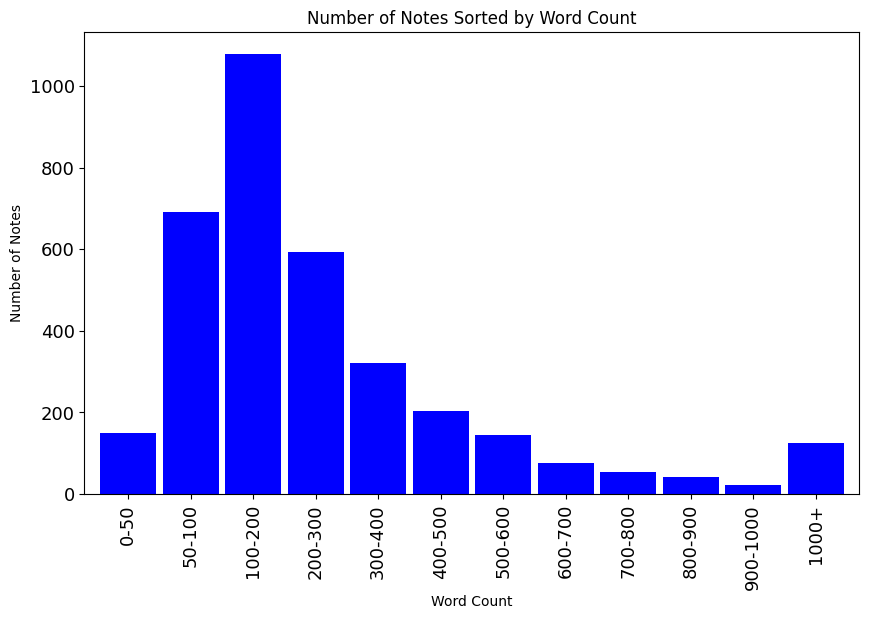

In [3]:

import matplotlib.pyplot as plt

# Split into groups by word count
grouped = df.groupby(pd.cut(df['Word Count'], [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]))
counts = grouped.size()

# Create the bar chart
counts.plot(kind='bar', color="blue", figsize=(10, 6), rot=90, fontsize=13, width=0.9)

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Number of Notes')
plt.title('Number of Notes Sorted by Word Count')

# Set the format of the x-axis labels
labels = ['0-50', '50-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']
plt.xticks(range(len(labels)), labels, rotation=90, ha='center')

# Show the chart
plt.show()